In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import matplotlib.pyplot as plt

In [50]:
test_data = pd.read_csv("dataset_test.csv")
test_labels = test_data["Class"]
test_data = test_data.drop("Class", axis=1)
train_data = pd.read_csv("dataset_train.csv")
train_labels = train_data["Class"]
train_data = train_data.drop("Class", axis=1)

In [51]:
# Hyperparameters
random_state = 1
nleafnodes = [2, 4, 10, 20, 50, 100, 200, 400, 600, None]
n_base_classifiers = [2, 5, 10, 15, 20]
max_leaf_nodes = [20, 50, 100, 200, 400]

In [52]:
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.2, random_state=1)

In [53]:
print(f"Training data: Features = {len(train_data.columns)}, Instances = {len(train_data)}")
print(f"Validation data: Features = {len(val_data.columns)}, Instances = {len(val_data)}")
print(f"Test data: Features = {len(test_data.columns)}, Instances = {len(test_data)}")

Training data: Features = 29, Instances = 17920
Validation data: Features = 29, Instances = 4480
Test data: Features = 29, Instances = 5600


In [60]:
# PREDICT DT
def predict_DT(nleafnodes, x_train, y_train, x_val, y_val, x_test, y_test):
    t_accuracy = []
    t_f1score  = []
    v_accuracy = []
    v_f1score  = []
    s_accuracy = []
    s_f1score  = []
    for nleaves in nleafnodes:
        print(f"Fitting: {nleaves}")
        clf = DecisionTreeClassifier(max_leaf_nodes=nleaves)
        clf.fit(x_train, y_train)
        t_pred = clf.predict(x_train)
        v_pred = clf.predict(x_val)
        s_pred = clf.predict(x_test)
        t_accuracy.append(accuracy_score(y_train, t_pred))
        t_f1score.append(f1_score(y_train, t_pred))
        v_accuracy.append(accuracy_score(y_val, v_pred))
        v_f1score.append(f1_score(y_val, v_pred))
        s_accuracy.append(accuracy_score(y_test, s_pred))
        s_f1score.append(f1_score(y_test, s_pred))
    return (t_accuracy, t_f1score, v_accuracy, v_f1score, s_accuracy, s_f1score)
        

In [61]:
def evaluate_DT(nleaves, x_train, y_train, x_test, y_test):
    clf = DecisionTreeClassifier(max_leaf_nodes=nleaves)
    clf.fit(x_train, y_train)
    t_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, t_pred)
    precision = precision_score(y_test, t_pred)
    recall = recall_score(y_test, t_pred)
    f1 = f1_score(y_test, t_pred)
    return (acc, precision, recall, f1)

In [65]:
(t_acc, t_f1, v_acc, v_f1, s_acc, s_f1) = predict_DT(
    nleafnodes, 
    train_data, train_labels, 
    val_data, val_labels, 
    test_data, test_labels)

Fitting: 2
Fitting: 4
Fitting: 10
Fitting: 20
Fitting: 50
Fitting: 100
Fitting: 200
Fitting: 400
Fitting: 600
Fitting: None


In [66]:
predict_DT_df = pd.DataFrame()
predict_DT_df["nleafnodes"] = nleafnodes
predict_DT_df["Train_Accuracy"] = t_acc
predict_DT_df["Train_F1"] = t_f1
predict_DT_df["Validation_Accuracy"] = v_acc
predict_DT_df["Validation_F1"] = v_f1
print(predict_DT_df)
predict_DT_df.to_csv("predict_DT.csv")

   nleafnodes  Train_Accuracy  Train_F1  Validation_Accuracy  Validation_F1
0         2.0        0.957589  0.910208             0.961161       0.918002
1         4.0        0.963449  0.923651             0.966518       0.930168
2        10.0        0.970759  0.939673             0.975670       0.949137
3        20.0        0.979185  0.957609             0.977679       0.954086
4        50.0        0.987109  0.973919             0.982589       0.964088
5       100.0        0.992467  0.984823             0.984821       0.968807
6       200.0        0.997712  0.995424             0.979464       0.958596
7       400.0        1.000000  1.000000             0.979018       0.957734
8       600.0        1.000000  1.000000             0.980580       0.961039
9         NaN        1.000000  1.000000             0.978795       0.957456


In [67]:
max_val = v_f1.index(max(v_f1)) 
(s_accuracy, s_precision, s_recall, s_f1score) = evaluate_DT(
    nleafnodes[max_val],
    train_data, 
    train_labels, 
    test_data, 
    test_labels)

print(f"Test scores: Accuracy = {s_accuracy:.2f}, Precision = {s_precision:.2f}, Recall = {s_recall:.2f}, F1 Score = {s_f1score:.2f}")

Test scores: Accuracy = 0.98, Precision = 0.97, Recall = 0.95, F1 Score = 0.96


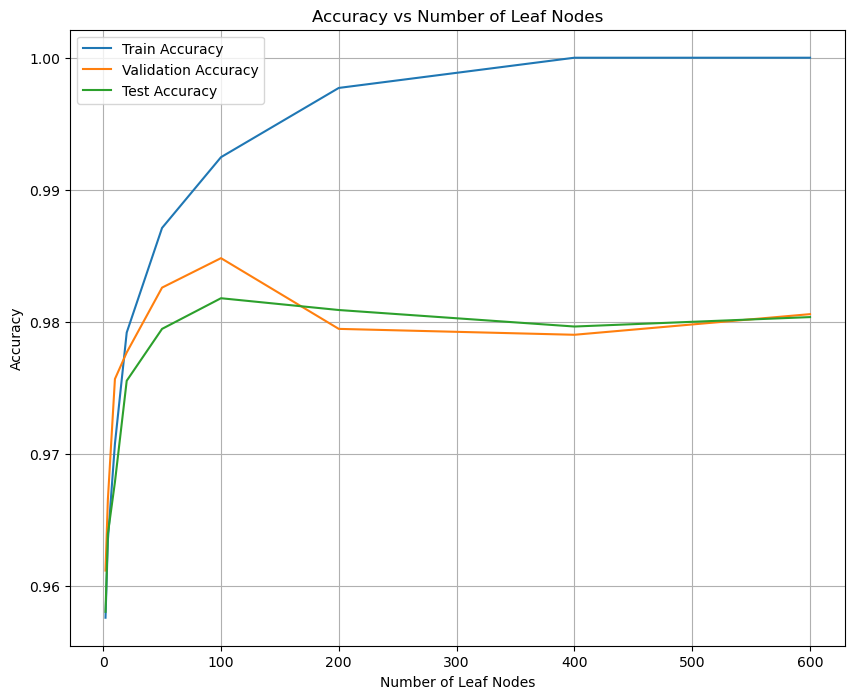

In [68]:
plt.figure(figsize=(10,8))
plt.plot(nleafnodes, t_acc, label="Train Accuracy")
plt.plot(nleafnodes, v_acc, label="Validation Accuracy")
plt.plot(nleafnodes, s_acc, label="Test Accuracy")
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Leaf Nodes")

plt.grid(True)
plt.legend()
plt.show()